In [1]:
# Exercise 1: Feature Selection with SelectKBest

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [251]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_iris, load_wine, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
# Load the Iris dataset from scikit-learn.
iris = load_iris()

In [303]:
# Split the dataset into features and target variable.
X_iris = iris.data
y_iris = iris.target

In [117]:
feature_names = iris.feature_names
df = pd.DataFrame(X_iris, columns=feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
# Use SelectKBest with the chi2 score function to select the top 2 features.
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X_iris, y_iris)

SelectKBest(k=2, score_func=<function chi2 at 0x00000290D5181440>)

In [127]:
# Print the selected feature names.
selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]
print("Selected features:", selected_features)

Selected features: ['petal length (cm)', 'petal width (cm)']


In [33]:
# Exercise 2: Feature Importance with Random Forest

In [309]:
# Load the Wine dataset from scikit-learn.
wine = load_wine()
X_wine = wine.data
y_wine = wine.target 

In [131]:
# Split the dataset into training and testing sets.
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

In [133]:
# Train a Random Forest classifier on the training data.
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_wine, y_train_wine)

RandomForestClassifier(random_state=42)

In [135]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

In [137]:
# Visualise
# Create a DataFrame for visualization
feature_names = wine.feature_names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df

,Feature,Importance
0,alcohol,0.112398
1,malic_acid,0.035703
2,ash,0.021282
3,alcalinity_of_ash,0.032425
4,magnesium,0.036841
5,total_phenols,0.029279
6,flavanoids,0.202293
7,nonflavanoid_phenols,0.013515
8,proanthocyanins,0.023561
9,color_intensity,0.171202


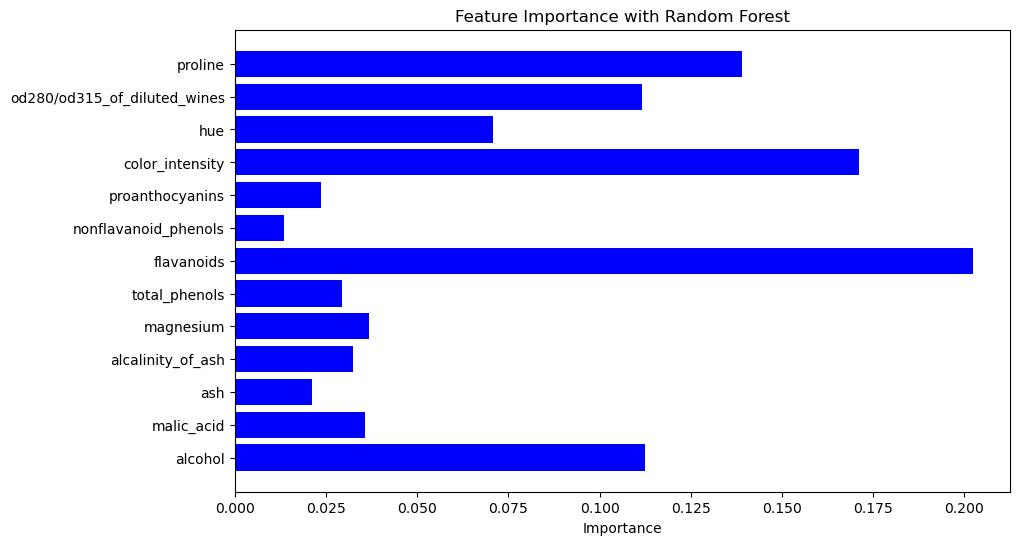

In [139]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance with Random Forest')
plt.show()

In [63]:
# Exercise 3: Recursive Feature Elimination (RFE)

In [141]:
# Load the Breast Cancer dataset from scikit-learn.
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

In [143]:
# Split the dataset into training and testing sets.
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [311]:
# Use RFE with a Support Vector Machine (SVM) classifier to select features.
svm_classifier = SVC(kernel='linear')
rfe = RFE(estimator=svm_classifier, n_features_to_select=5)
rfe.fit(X_train_bc, y_train_bc)
# извлекаем индексы
selected_features = rfe.support_ 
feature_names = data.feature_names[selected_features] 
print(feature_names)

['worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry']


In [151]:
# Train an SVM model with the selected features and evaluate its performance.
X_train_rfe = rfe.transform(X_train_bc) 
X_test_rfe = rfe.transform(X_test_bc)   
svm_classifier.fit(X_train_rfe, y_train_bc)
y_pred = svm_classifier.predict(X_test_rfe)
accuracy = accuracy_score(y_test_bc, y_pred)
report = classification_report(y_test_bc, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        43
           1       0.83      0.96      0.89        71

    accuracy                           0.85       114
   macro avg       0.87      0.82      0.83       114
weighted avg       0.86      0.85      0.85       114



In [75]:
# Exercise 4: L1 Regularization for Feature Selection

In [153]:
# Load the Diabetes dataset from scikit-learn.
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [155]:
# Split the dataset into training and testing sets.
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [157]:
# Apply Lasso regression for feature selection.
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_diabetes, y_train_diabetes)

Lasso(alpha=0.1)

In [171]:
# Train a model using selected features and evaluate its performance.
X_train_lasso = X_train_diabetes[:, selected_features_lasso]
X_test_lasso = X_test_diabetes[:, selected_features_lasso]
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_lasso, y_train_diabetes)
y_pred_lasso = lasso_model.predict(X_test_lasso)
mse = mean_squared_error(y_test_diabetes, y_pred_lasso)
r2 = r2_score(y_test_diabetes, y_pred_lasso)

print(f"Mean Squared Error (Lasso): {mse:.2f}")
print(f"R^2 Score (Lasso): {r2:.2f}")

Mean Squared Error (Lasso): 2798.24
R^2 Score (Lasso): 0.47


In [175]:
# Classification Exercises
# Exercise 1: Logistic Regression

In [187]:
# Load the Iris dataset from scikit-learn.
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [189]:
# Split the dataset into training and testing sets.
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [191]:
# Train a logistic regression model on the training set.
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_iris, y_train_iris)
y_pred_iris = log_reg.predict(X_test_iris)

In [193]:
# Evaluate the model's performance on the test set using accuracy and a confusion matrix.
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
confusion_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("Exercise 1: Logistic Regression (Iris Dataset)")
print(f"Accuracy: {accuracy_iris:.2f}")
print("Confusion Matrix:")
print(confusion_iris)
print("\n")

Exercise 1: Logistic Regression (Iris Dataset)
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




In [195]:
# Exercise 2: Support Vector Machine (SVM)

In [205]:
# Load the Breast Cancer dataset from scikit-learn.
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

In [207]:
# Split the dataset into training and testing sets.
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [209]:
# Train an SVM model on the training data.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_bc, y_train_bc)
y_pred_bc = svm_model.predict(X_test_bc)

In [211]:
# Evaluate the model's performance on the test data using accuracy and a confusion matrix.
accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
confusion_bc = confusion_matrix(y_test_bc, y_pred_bc)

print("Exercise 2: Support Vector Machine (Breast Cancer Dataset)")
print(f"Accuracy: {accuracy_bc:.2f}")
print("Confusion Matrix:")
print(confusion_bc)
print("\n")

Exercise 2: Support Vector Machine (Breast Cancer Dataset)
Accuracy: 0.96
Confusion Matrix:
[[39  4]
 [ 1 70]]




In [213]:
# Exercise 3: Decision Tree Classifier

In [225]:
# Load the Wine dataset from scikit-learn.
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

In [227]:
# Split the dataset into training and testing sets.
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

In [229]:
# Train a decision tree classifier on the training set.
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_wine, y_train_wine)
y_pred_wine = decision_tree.predict(X_test_wine)

Exercise 3: Decision Tree Classifier (Wine Dataset)
Accuracy: 0.94
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]




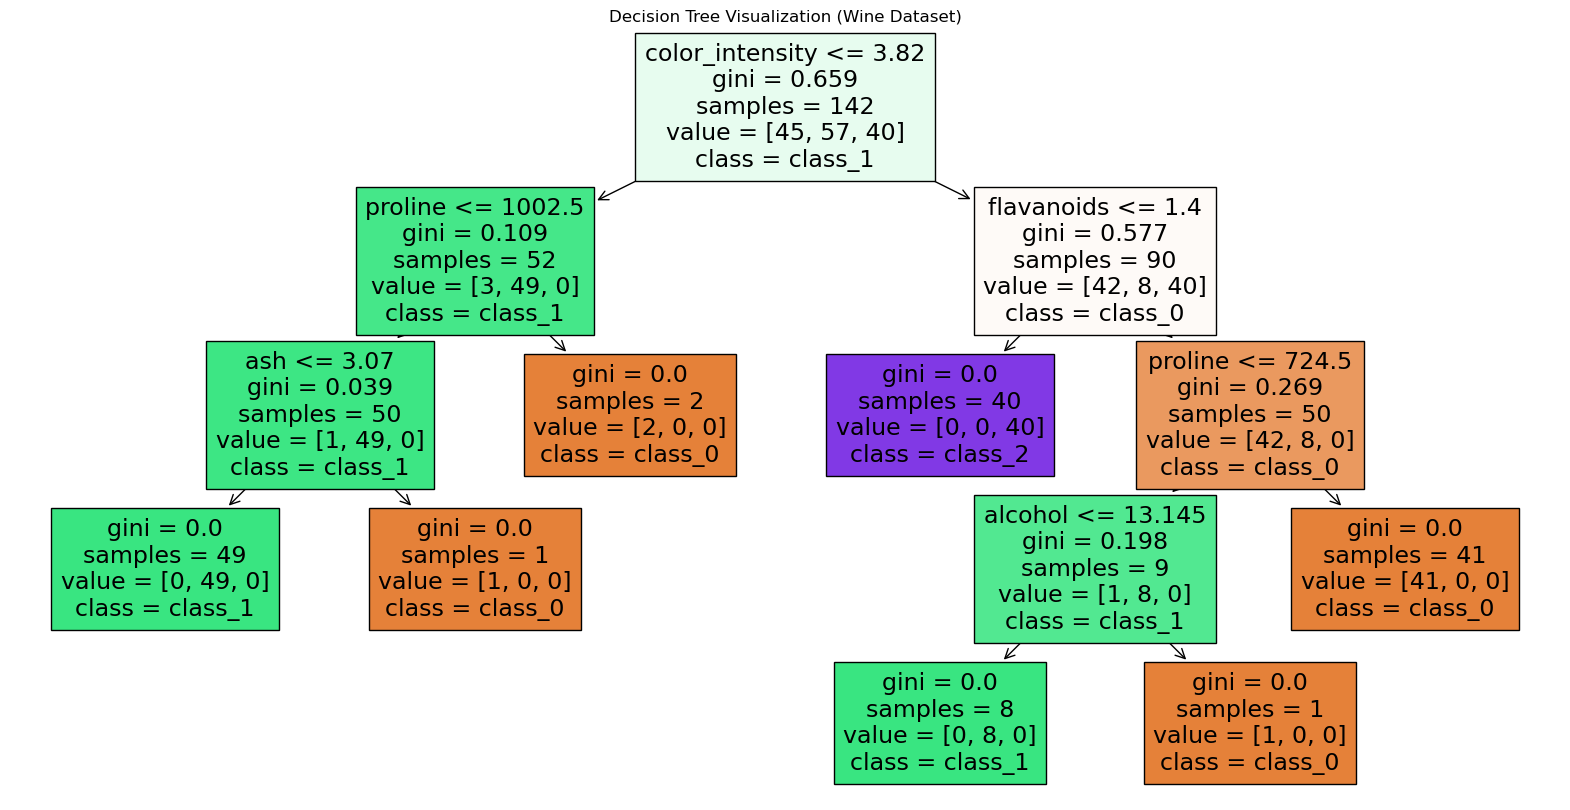

In [231]:
# Visualize the decision tree.
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
confusion_wine = confusion_matrix(y_test_wine, y_pred_wine)

print("Exercise 3: Decision Tree Classifier (Wine Dataset)")
print(f"Accuracy: {accuracy_wine:.2f}")
print("Confusion Matrix:")
print(confusion_wine)
print("\n")
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.title("Decision Tree Visualization (Wine Dataset)")
plt.show()

In [233]:
# Regression Exercises
# Exercise 1: Linear Regression

In [253]:
# Load the Boston Housing dataset from scikit-learn.
california = fetch_california_housing()
X_california = california.data
y_california = california.target

In [255]:
# Split the dataset into training and testing sets.
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

In [257]:
# Train a linear regression model on the training set.
linear_reg = LinearRegression()
linear_reg.fit(X_train_california, y_train_california)
y_pred_california = linear_reg.predict(X_test_california)

In [259]:
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.
mse_california = mean_squared_error(y_test_california, y_pred_california)
r2_california = r2_score(y_test_california, y_pred_california)

print("Exercise 1: Linear Regression (California Housing Dataset)")
print(f"Mean Squared Error: {mse_california:.2f}")
print(f"R-squared Score: {r2_california:.2f}")
print("\n")

Exercise 1: Linear Regression (California Housing Dataset)
Mean Squared Error: 0.56
R-squared Score: 0.58




In [261]:
# Exercise 2: Ridge Regression

In [271]:
# Load the Diabetes dataset from scikit-learn.
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [273]:
# Split the dataset into training and testing sets.
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [275]:
# Train a Ridge regression model on the training set.
ridge_reg = Ridge()
ridge_reg.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = ridge_reg.predict(X_test_diabetes)

In [277]:
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.
mse_diabetes = mean_squared_error(y_test_diabetes, y_pred_diabetes)
r2_diabetes = r2_score(y_test_diabetes, y_pred_diabetes)

print("Exercise 2: Ridge Regression (Diabetes Dataset)")
print(f"Mean Squared Error: {mse_diabetes:.2f}")
print(f"R-squared Score: {r2_diabetes:.2f}")
print("\n")

Exercise 2: Ridge Regression (Diabetes Dataset)
Mean Squared Error: 3077.42
R-squared Score: 0.42




In [279]:
# Exercise 3: Decision Tree Regression

In [289]:
# Load the Boston Housing dataset from scikit-learn.
california = fetch_california_housing()
X_california = california.data
y_california = california.target

In [291]:
# Split the dataset into training and testing sets.
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

In [293]:
# Train a decision tree regressor on the training set.
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_california, y_train_california)
y_pred_tree = tree_reg.predict(X_test_california)

In [295]:
# Evaluate the model's performance using mean squared error (MSE).
mse_tree = mean_squared_error(y_test_california, y_pred_tree)
print(f"Exercise 3: Decision Tree Regression (California Housing Dataset)")
print(f"Mean Squared Error: {mse_tree:.2f}")

Exercise 3: Decision Tree Regression (California Housing Dataset)
Mean Squared Error: 0.50
